In [2]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"
import fileinput
import re

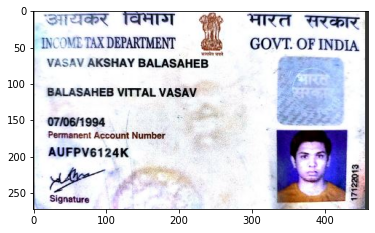

In [9]:
img = cv2.imread(r"E:\Data Science\open_internship\Akshay_pancard.JPG")
plt.imshow(img)

In [10]:
text = pytesseract.image_to_string(img)
print(text)

Sate TART bi AR Ga
INCOME TAX DEPARTMENT = GOVT. OF INDIA
VASAV AKSHAY BALASAHEB

BALASAHEB VITTAL VASAV

 

07/06/1994
Permanent Account Number

AUFPV6124K ee
nae |

Signature

“17t22013



In [5]:
f = open(r"E:\Data Science\open_internship\Akshay_pancard.txt", "w")   # 'r' for reading and 'w' for writing
f.write(text)
f.close()

In [11]:
lines = text.split("\n")
non_empty_lines = [line for line in lines if line.strip() != ""]

string_without_empty_lines = ""
for line in non_empty_lines:
      string_without_empty_lines += line + "\n"
print( string_without_empty_lines)

Sate TART bi AR Ga
INCOME TAX DEPARTMENT = GOVT. OF INDIA
VASAV AKSHAY BALASAHEB
BALASAHEB VITTAL VASAV
07/06/1994
Permanent Account Number
AUFPV6124K ee
nae |
Signature
“17t22013



In [12]:
lines = text.split("\n")
#print(lines)
non_empty_lines = []
for line in lines:
    if line.strip() != "":
        non_empty_lines.append(line)
list_lnfo = []
for i in range(len(non_empty_lines)):
    if len(non_empty_lines[i]) !=0:
        list_lnfo.append(non_empty_lines[i])
list_lnfo
        
# string_without_empty_lines = ""
# for line in non_empty_lines:
#       string_without_empty_lines += line + "\n"
# print( string_without_empty_lines)

['Sate TART bi AR Ga',
 'INCOME TAX DEPARTMENT = GOVT. OF INDIA',
 'VASAV AKSHAY BALASAHEB',
 'BALASAHEB VITTAL VASAV',
 '07/06/1994',
 'Permanent Account Number',
 'AUFPV6124K ee',
 'nae |',
 'Signature',
 '“17t22013']

In [13]:
bad_chars = ['_','—', '/', "=","@"]
final_list =[]
for p in range(len(list_lnfo)):
    # initializing test string
    test_string = list_lnfo[p]
    for i in bad_chars :
        test_string = test_string.replace(i, '')
    final_list.append(test_string)
print(final_list)

['Sate TART bi AR Ga', 'INCOME TAX DEPARTMENT  GOVT. OF INDIA', 'VASAV AKSHAY BALASAHEB', 'BALASAHEB VITTAL VASAV', '07061994', 'Permanent Account Number', 'AUFPV6124K ee', 'nae |', 'Signature', '“17t22013']


In [34]:
#to grab Pan number
final_info = []
final_dict ={}
sub_str ="Permanent Account Number"
for i in range(len(list_lnfo)):
    if (list_lnfo[i].find(sub_str) != -1):
        final_info.append("Permanent Account Number")
        final_info.append(list_lnfo[i+1])
        final_dict.update({"Permanent Account Number":final_list[i+1]})
#final_info
final_dict
#final_dict

{'Permanent Account Number': 'AUFPV6124K ee'}

In [38]:
#to grab Date of Birth
person_info = {}
for i in range(len(final_list)):
        if (final_list[i].find("INCOME TAX DEPARTMENT") != -1):
            #print(i)
            person_info.update({"Person_Name":final_list[i+1]})
            person_info.update({"Fathers_Name":final_list[i+2]})
            person_info.update({"DOB":final_list[i+3]})
print(person_info)

{'Person_Name': 'VASAV AKSHAY BALASAHEB', 'Fathers_Name': 'BALASAHEB VITTAL VASAV', 'DOB': '07061994'}


In [40]:
person_info.update(final_dict)
person_info

{'Person_Name': 'VASAV AKSHAY BALASAHEB',
 'Fathers_Name': 'BALASAHEB VITTAL VASAV',
 'DOB': '07061994',
 'Permanent Account Number': 'AUFPV6124K ee'}